# TP 2 : Filtres Spatials

# Nom : Benmalek
# Prenom : Zohir
# Promo : MID 1ér année 


In [169]:
import cv2 as cv
# Pour lire l'image et quelque traitements d'images .

import numpy as np
# Pour les tableaux 

import matplotlib.pyplot as plt
# Pour l'affichage de l'image 

import math
# Pour le calcul du PSNR

In [170]:
# Lire l'image :
image = cv.imread("/home/azar/Desktop/traitement_images/TP2/cameraman.tif")


In [171]:
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Partie 1 
### 1 - Ajouter a l'image un bruit blanc gaussien de variance alpha^2 = 0.01

In [172]:
# Generate Gaussian noise
gauss = np.random.normal(0,1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
I1 = cv.add(image,gauss)

### Affichage sur la méme figure l'image originelle et l'image bruitée

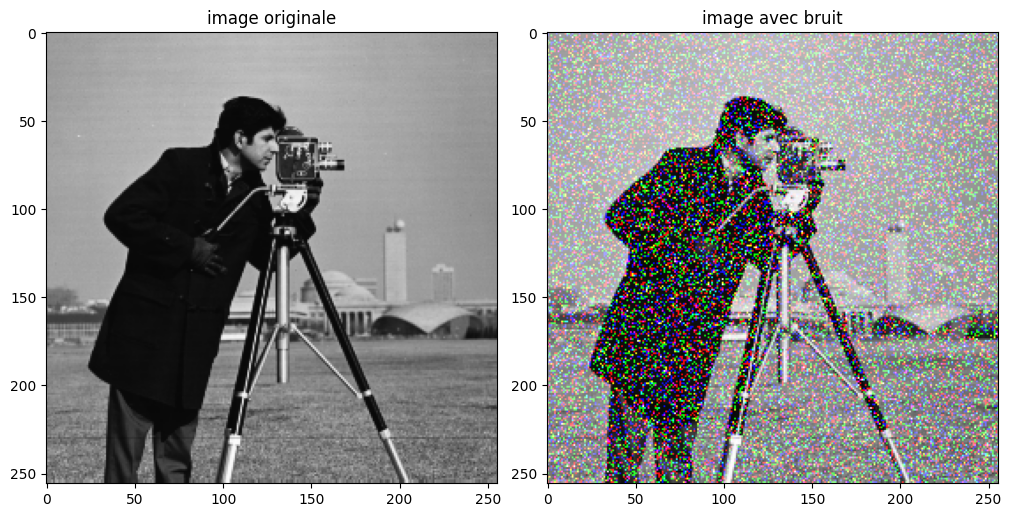

In [173]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5),layout="constrained")
axs[0].imshow(image,cmap='gray')
axs[0].set_title("image originale")
axs[1].imshow(I1,cmap='gray')
axs[1].set_title("image avec bruit");

### Faire varier alpha

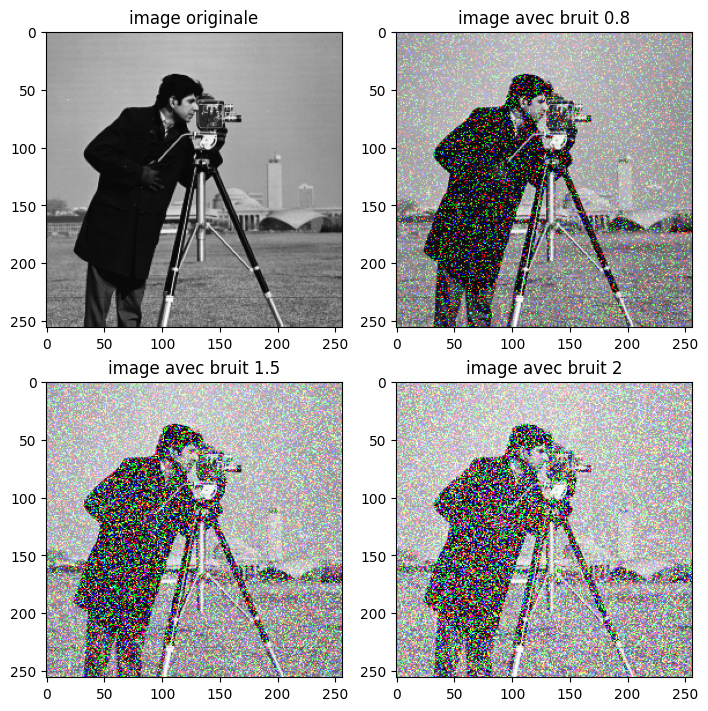

In [198]:
# Generate Gaussian noise


gauss1 = np.random.normal(0,0.8,image.size)
gauss2 = np.random.normal(0,1.5,image.size)
gauss3 = np.random.normal(0,2,image.size)



gauss1 = gauss1.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
gauss2 = gauss2.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
gauss3 = gauss3.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')


img_gauss1 = cv.add(image,gauss1)
img_gauss2 = cv.add(image,gauss2)
img_gauss3 = cv.add(image,gauss3)


fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7, 7),layout="constrained")
axs[0][0].imshow(image,cmap='gray')
axs[0][0].set_title("image originale")

axs[0][1].imshow(img_gauss1,cmap='gray')
axs[0][1].set_title("image avec bruit 0.8")

axs[1][0].imshow(img_gauss2,cmap='gray')
axs[1][0].set_title("image avec bruit 1.5")

axs[1][1].imshow(img_gauss3,cmap='gray')
axs[1][1].set_title("image avec bruit 2");




# Commentaire 
Plus que le bruit augmente plus l'image devient plus flou , c'est comme une autre image essaye de prendre la place de l'image originale .

### 2 - Ajouter à l'image un bruit poivre et sel avec un pourcentage p=0.05 de pixels 

In [175]:
noise = np.random.randint(low=0, high=50, size = (image.shape[0], image.shape[1], 1))
image_SP = np.where(noise == 0, 0, image)
I2 = np.where(noise == 49, 255, image_SP)

### Affichage sur la méme figure l'image originelle et l'image bruité 

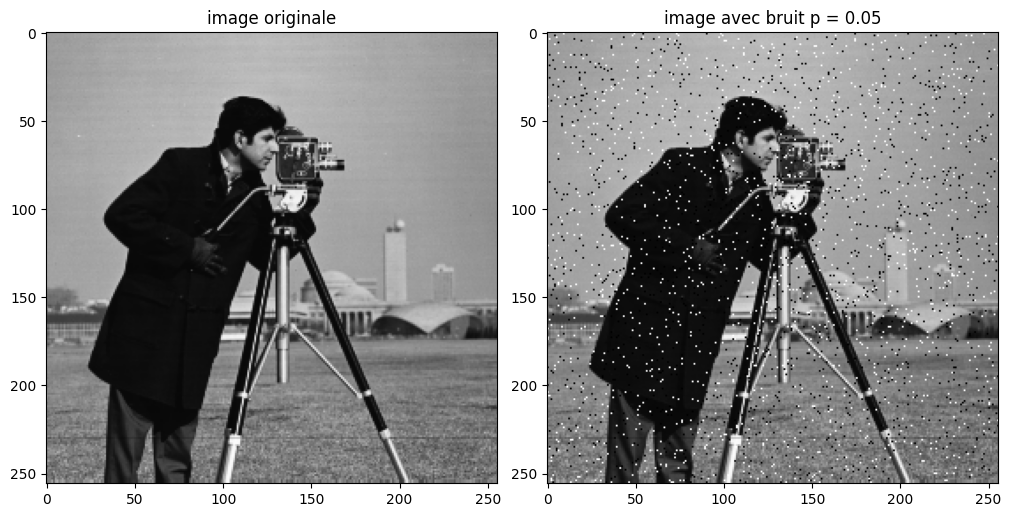

In [176]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5),layout="constrained")
axs[0].imshow(image,cmap='gray')
axs[0].set_title("image originale")
axs[1].imshow(I2,cmap='gray')
axs[1].set_title("image avec bruit p = 0.05");

### Faire varier p .

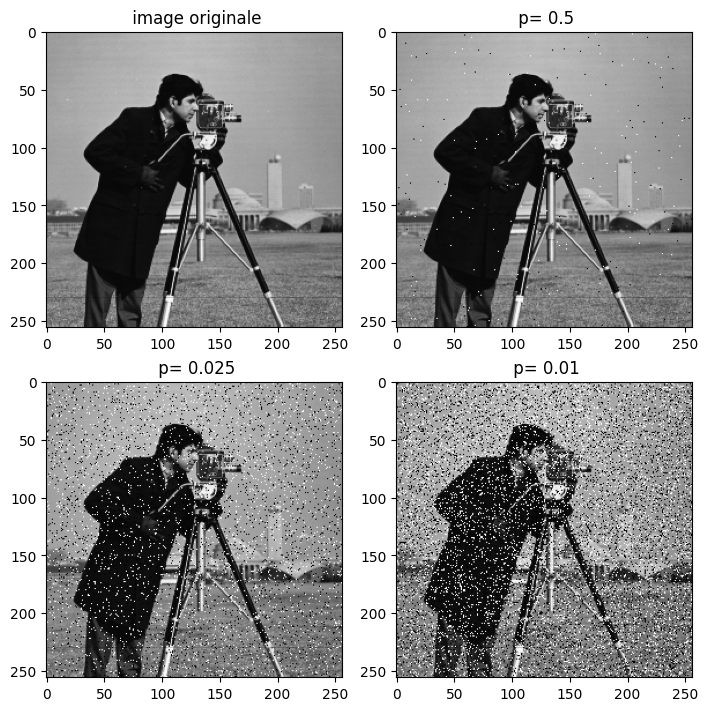

In [199]:
# Generate Gaussian noise
noise = np.random.randint(low=0, high=500, size = (image.shape[0], image.shape[1], 1))
image_SP1 = np.where(noise == 0, 0, image)
image_SP1 = np.where(noise == (499), 255, image_SP1)


noise = np.random.randint(low=0, high=25, size = (image.shape[0], image.shape[1], 1))
image_SP2 = np.where(noise == 0, 0, image)
image_SP2 = np.where(noise == (24), 255, image_SP2)


noise = np.random.randint(low=0, high=10, size = (image.shape[0], image.shape[1], 1))
image_SP3 = np.where(noise == 0, 0, image)
image_SP3 = np.where(noise == (9), 255, image_SP3)



fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(7, 7),layout="constrained")
axs[0][0].imshow(image,cmap='gray')
axs[0][0].set_title(" image originale")

axs[0][1].imshow(image_SP1,cmap='gray')
axs[0][1].set_title(" p= 0.5");


axs[1][0].imshow(image_SP2,cmap='gray')
axs[1][0].set_title(" p= 0.025");


axs[1][1].imshow(image_SP3,cmap='gray')
axs[1][1].set_title(" p= 0.01");




### Commentaire : 
Plus que P devient plus petit , plus que le bruit augmente .
Le bruit essaye de cacher l'image .

### 3 - Affichage sur une méme figure les images

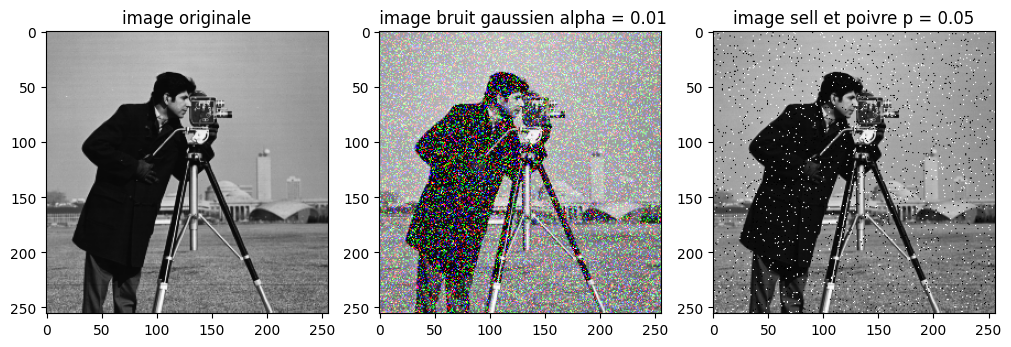

In [178]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 5),layout="constrained")

axs[0].imshow(image,cmap='gray')
axs[0].set_title("image originale")
axs[1].imshow(I1,cmap='gray')
axs[1].set_title(" image bruit gaussien alpha = 0.01")
axs[2].imshow(I2,cmap='gray')
axs[2].set_title("image sell et poivre p = 0.05");

### Commentaire : 
L'image bruité avec le filtre gaussien semble détruire l'image plus que le filtre de l'image sell et poivre .


L'image poivre et sell n'a que 2 couleurs.


C'est le noir et le blanc mais le filtre gaussien a plus d'autre couleurs ce qui va impacter plus l'image original .

# Partie 2 

### Exercice 1

La lécture de l'image est faite .

Voici l'application du bruit gaussien avec l'ecart specifié .
Et aussi l'application du lissage .

In [179]:
# Generate Gaussian noise
gauss = np.random.normal(0,0.1,image.size)
gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_blured = cv.add(image,gauss)

# Create the Kernel 
kernel1 = np.ones((5, 5), np.float32)/25
# Applying the filter
image_1 = cv.filter2D(src=img_blured, ddepth=-1, kernel=kernel1)

Voici la 2éme image avec l'application du masque .

In [180]:
kernel2 = np.matrix([[1, 2, 3, 2, 1],[2, 4, 6, 7, 2],[3, 6, 9, 6, 3],[2, 4, 6, 4, 2],[1, 2, 3, 2, 1]],np.float32)/81
image_2 = cv.filter2D(src=img_blured, ddepth=-1, kernel=kernel2)

Voici l'affichage des 3 images , l'image original , l'image avec lissage moyen et l'image avec le lissage par le masque indiqué .

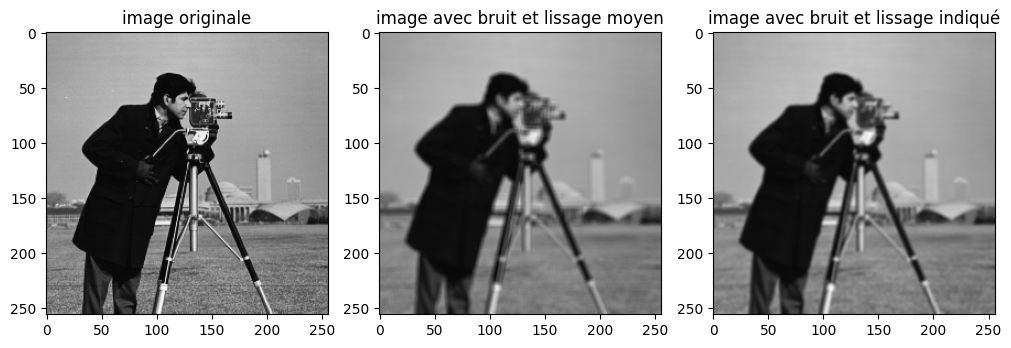

In [181]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(10, 5),layout="constrained")

axs[0].imshow(image,cmap='gray')
axs[0].set_title("image originale")
axs[1].imshow(image_1,cmap='gray')
axs[1].set_title("image avec bruit et lissage moyen")
axs[2].imshow(image_2,cmap='gray')
axs[2].set_title("image avec bruit et lissage indiqué");

### 1 - Comparaison :
Le lissage moyen semble rendre l'image plus flou .

Le lissage avec le masque indiqué rend l'image un peu flou .

L'image originale semble la meilleur en messant beaucoup plus de detailles a voire .



### 2 - La soustraction et l'affichage de l'image .

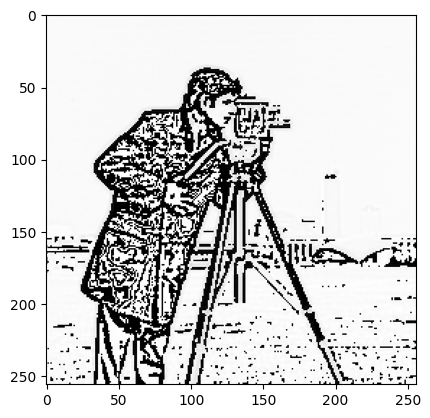

In [182]:
image_substraction = image_1-image_2
plt.imshow(image_substraction,cmap="gray");

### Comparaison :
L'image a pris tout les detailles important dans l'image !

Elle indique plus clairement les bordures de l'image tout en gardan les informations de l'image originale .

### 3 - Conclusion et justification des résultats : 

L'image original a était mise au mileu entre 2 images pour faire sortire une image qui contient des detailles caché , comme la bordure de l'homme .

Le lissage normal a mis en avance un bruit plus important mettant les bordures plus grandes et l'autre lissage a mis une bordure moin volimuneuse ce qui a rendus une gap entre les deux images et cette gap s'affiche clairement dans l'image de la soustraction .

# Exercice 2


### 1  : Voici le code 

In [183]:
# Generate Gaussian noise
noise = np.random.randint(low=0, high=50, size = (image.shape[0], image.shape[1], 1))
ex2_q1_image_sp = np.where(noise == 0, 0, image)
ex2_q1_image_sp = np.where(noise == (49), 255, ex2_q1_image_sp)

ex2_q1_tab_images=[]

for i in range(3,9,1):
    ex2_q1_image = cv.blur(ex2_q1_image_sp, (i, i))
    ex2_q1_tab_images.append(ex2_q1_image)


### L'étude qualitative et quantitative : 

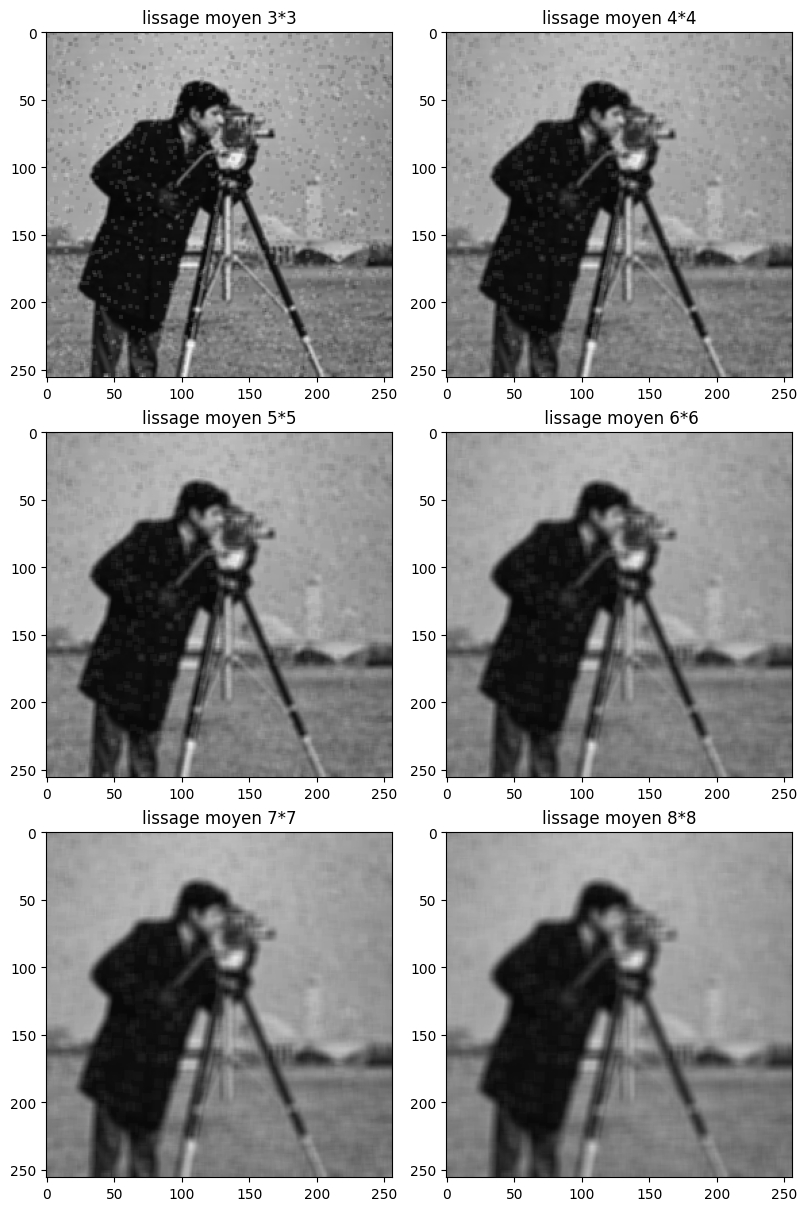

In [202]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 12),layout="constrained")
axs[0][0].imshow(ex2_q1_tab_images[0],cmap='gray')
axs[0][0].set_title("lissage moyen 3*3")

axs[0][1].imshow(ex2_q1_tab_images[1],cmap='gray')
axs[0][1].set_title("lissage moyen 4*4");


axs[1][0].imshow(ex2_q1_tab_images[2],cmap='gray')
axs[1][0].set_title("lissage moyen 5*5");


axs[1][1].imshow(ex2_q1_tab_images[3],cmap='gray')
axs[1][1].set_title(" lissage moyen 6*6");

axs[2][0].imshow(ex2_q1_tab_images[4],cmap='gray')
axs[2][0].set_title("lissage moyen 7*7");

axs[2][1].imshow(ex2_q1_tab_images[5],cmap='gray')
axs[2][1].set_title("lissage moyen 8*8");

### Code pour calculer le MSE

In [185]:
def MSE(image,image_modifie):
    mse = np.mean((image - image_modifie)**2)
    return mse

### Code pour calculer le PSNR

In [186]:

def PSNR(image_original,image_modifie):
    mse = MSE(image_original,image_modifie)
    MAX = 255.0
    psnr = 20 * math.log10(MAX / math.sqrt(mse))
    return psnr

### Tracer le PSNR 

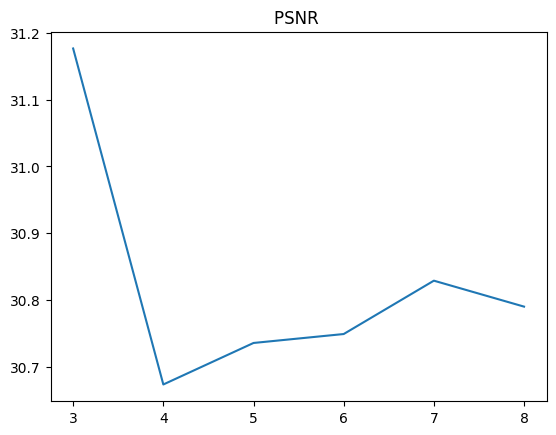

In [187]:
dict_psnr = {}
for i in range(3,9,1):
    dict_psnr[f"{i}"] = float(PSNR(image,ex2_q1_tab_images[i-3]))
lists = sorted(dict_psnr.items()) 
x, y = zip(*lists)
plt.plot(x, y)
plt.title("PSNR ")
plt.show()

### L'étude qualitative : 
Plus que la taille du lissage augment , l'image devient plus flou ce qui est logique vue l'impact de la taille de la grid sur l'image si elle augmente .

### L'étude quantitative :
D'apres le graph , la valeur du PSNR etais grande puis elle a diminue d'une seul fois .

Apres plus que la taille augmente la valeur du PSNR augmente .



### Si on applique le lissage par moyenne plusieurs fois : 

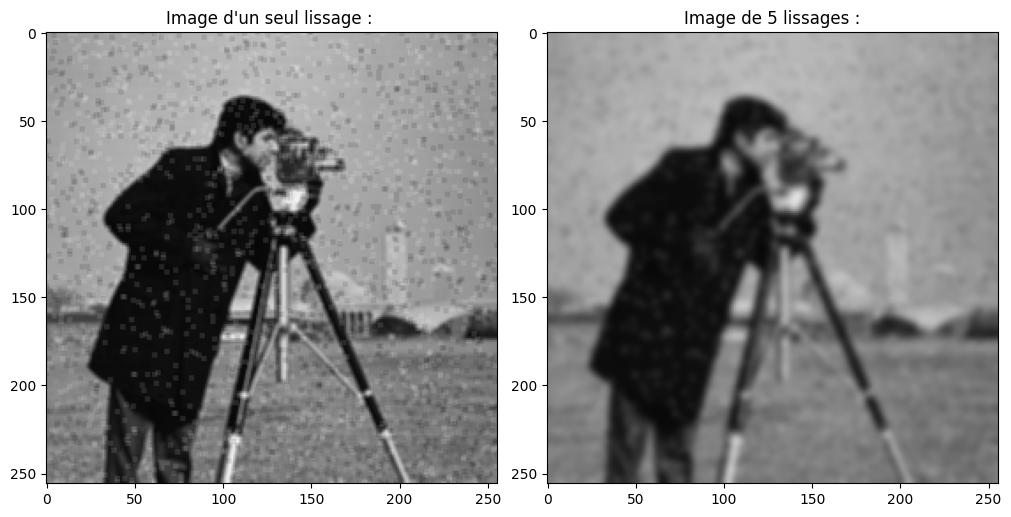

In [188]:
# Generate Gaussian noise
noise = np.random.randint(low=0, high=50, size = (image.shape[0], image.shape[1], 1))
ex2_q1_image_sp = np.where(noise == 0, 0, image)
ex2_q1_image_sp = np.where(noise == (49), 255, ex2_q1_image_sp)
premier_lissage = cv.blur(ex2_q1_image_sp, (3, 3))

plusieur_lissages  = cv.blur(ex2_q1_image_sp, (3, 3))
for i in range(5):
    plusieur_lissages = cv.blur(plusieur_lissages, (3, 3))

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5),layout="constrained")
axs[0].imshow(premier_lissage,cmap='gray')
axs[0].set_title("Image d'un seul lissage : ")
axs[1].imshow(plusieur_lissages,cmap='gray')
axs[1].set_title("Image de 5 lissages :");


### Oui , sa affect l'image !

### 2 - Faire le méme travail que la question 1 en utilisant les filtres gaussien et médian :

In [189]:
ex2_q2_tab_images=[]

for i in range(3,14,2):
    ex2_q2_image =cv.GaussianBlur(image, (i, i), 0)
    ex2_q2_gauss_med = cv.medianBlur(ex2_q2_image, 9)
    ex2_q2_tab_images.append(ex2_q2_image)


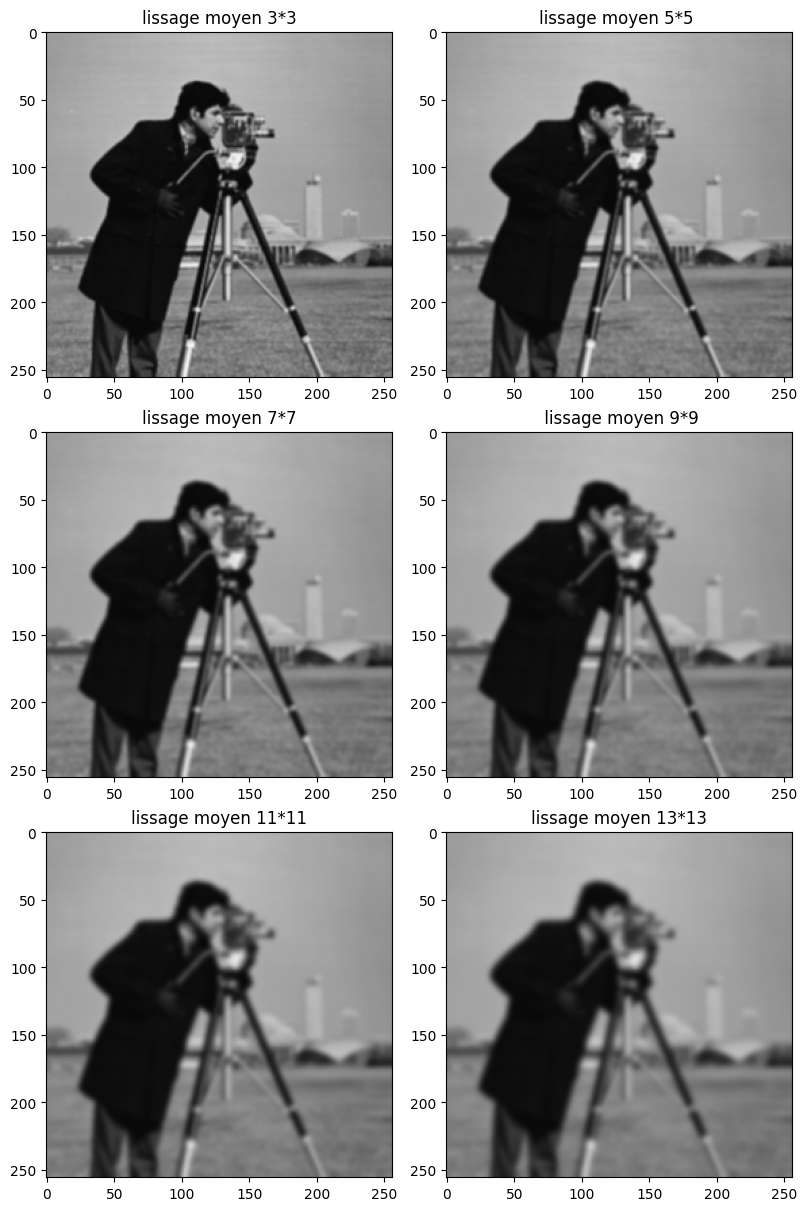

In [204]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 12),layout="constrained")
axs[0][0].imshow(ex2_q2_tab_images[0],cmap='gray')
axs[0][0].set_title("lissage moyen 3*3")

axs[0][1].imshow(ex2_q2_tab_images[1],cmap='gray')
axs[0][1].set_title("lissage moyen 5*5 ");


axs[1][0].imshow(ex2_q2_tab_images[2],cmap='gray')
axs[1][0].set_title("lissage moyen 7*7");


axs[1][1].imshow(ex2_q2_tab_images[3],cmap='gray')
axs[1][1].set_title(" lissage moyen 9*9");

axs[2][0].imshow(ex2_q2_tab_images[4],cmap='gray')
axs[2][0].set_title("lissage moyen 11*11");

axs[2][1].imshow(ex2_q2_tab_images[5],cmap='gray')
axs[2][1].set_title("lissage moyen 13*13");

### Calcul PSNR

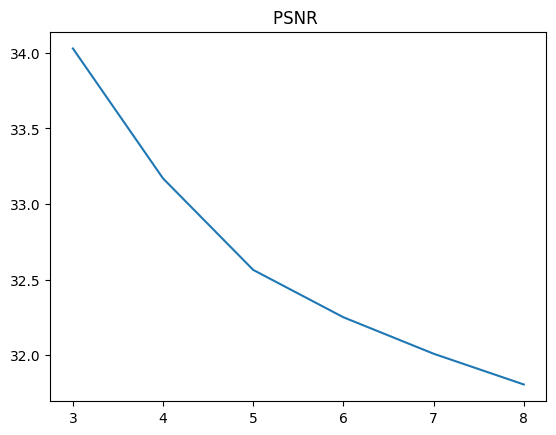

In [191]:

dict_psnr_2 = {}

for i in range(3,9,1):
    dict_psnr_2[f"{i}"] = float(PSNR(image,ex2_q2_tab_images[i-3]))
lists = sorted(dict_psnr_2.items()) 
x, y = zip(*lists)
plt.plot(x, y)
plt.title("PSNR ")
plt.show()



### Etude qualitative et quantitative :
#### Edute qualitative : 
Plus que la taille du lissage augmente plus que l'image es plus flou , ce qui est logive .

#### Etude quantitative : 
Plus que la taille du lissage augment plus que le PSNR diminue 

### 3 - Faire le méme travaill que question 1 et 2 en ajoutant des bruits de type gaussien et speeckle : 


In [194]:
ex2_q3_tab_images=[]
for i in range(3,14,2):
    # Generate Gaussian noise
    gauss = np.random.normal(0,1,image.size)
    gauss = gauss.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8')
    # Add the Speckle noise to the image
    ex2_q3_image = image + image * gauss

    ex2_q3_image =cv.GaussianBlur(ex2_q3_image, (i, i), 0)
    
    ex2_q3_tab_images.append(ex2_q3_image)

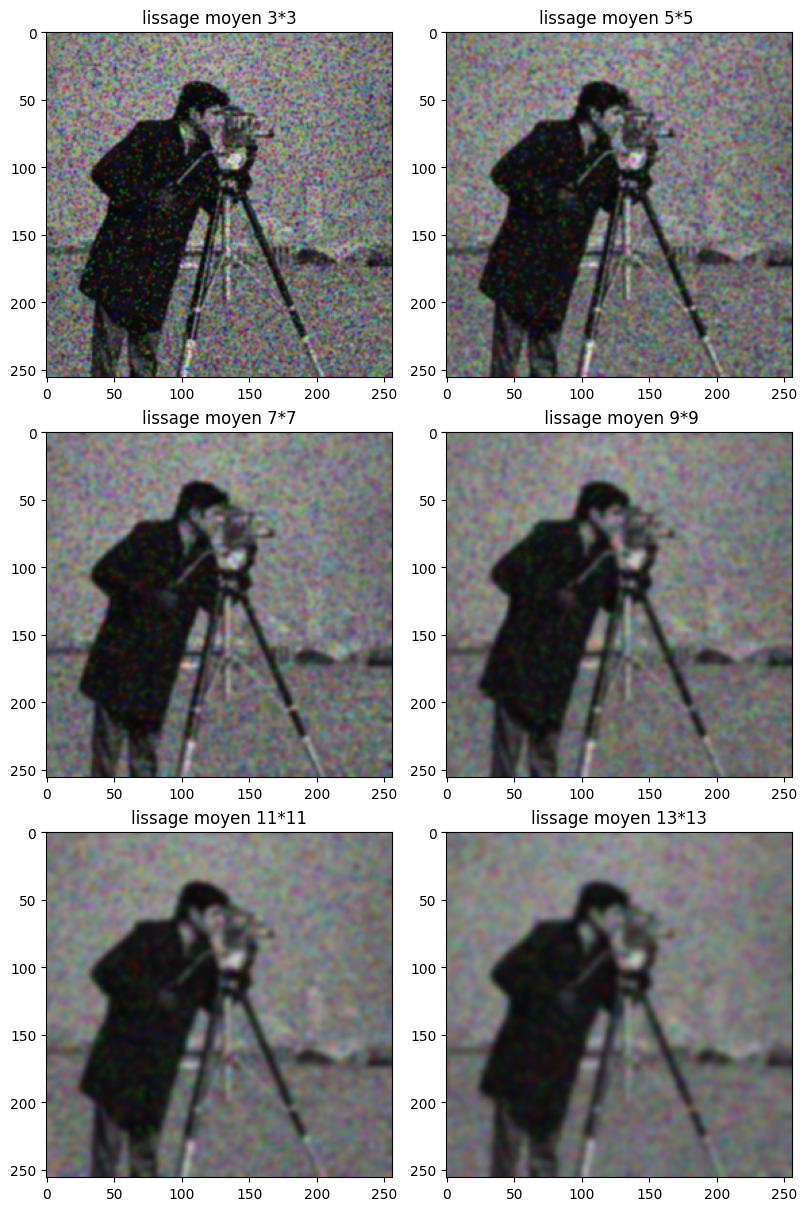

In [206]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(8, 12),layout="constrained")
axs[0][0].imshow(ex2_q3_tab_images[0],cmap='gray')
axs[0][0].set_title("lissage moyen 3*3")

axs[0][1].imshow(ex2_q3_tab_images[1],cmap='gray')
axs[0][1].set_title("lissage moyen 5*5 ");


axs[1][0].imshow(ex2_q3_tab_images[2],cmap='gray')
axs[1][0].set_title("lissage moyen 7*7");


axs[1][1].imshow(ex2_q3_tab_images[3],cmap='gray')
axs[1][1].set_title(" lissage moyen 9*9");

axs[2][0].imshow(ex2_q3_tab_images[4],cmap='gray')
axs[2][0].set_title("lissage moyen 11*11");

axs[2][1].imshow(ex2_q3_tab_images[5],cmap='gray')
axs[2][1].set_title("lissage moyen 13*13");

### Calcul PSNR

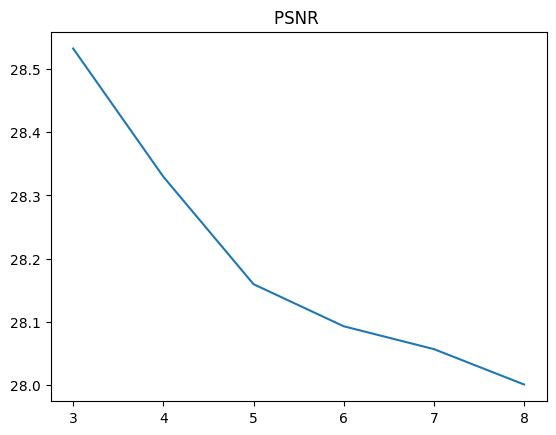

In [197]:
dict_psnr_3 = {}

for i in range(3,9,1):
    dict_psnr_3[f"{i}"] = float(PSNR(image,ex2_q3_tab_images[i-3]))
lists = sorted(dict_psnr_3.items()) 
x, y = zip(*lists)
plt.plot(x, y)
plt.title("PSNR ")
plt.show()



### Etude qualitataive et quantitative : 
#### Etude qualitative : 
Le filtre se concentre a faire extraire le noire du réste de l'image ce qui est util mais ça a des concequence visibles et claire .

Plus que la taille du lissage augmente plus l'image se fait modifié plus .

#### Etude quantitative : 
Le PSNR diminue en fonction de l'augmentation de la taille du lissage .